In [6]:
import collections
import itertools
import json
import os
import re
import glob
import operator

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

In [2]:
def compute_accuracy(rows):
    levels = ['easy', 'medium', 'hard', 'extra', 'all']
    total = collections.defaultdict(int)
    exact = collections.defaultdict(int)
    for row in rows:
        exact[row['hardness']] += row['exact']
        exact['all'] += row['exact']
        total[row['hardness']] += 1
        total['all'] += 1
    
    result = {hardness: exact[hardness] / total[hardness]
              for hardness in levels}
    result = {**result, **{'{} count'.format(hardness): total[hardness] for hardness in levels}}
    return result

In [3]:
accuracy_per_run = collections.defaultdict(dict)
rows = []
for d in sorted(glob.glob('../logdirs/20190518-opt/*')):
    exp_name = os.path.basename(d)
    exp_vars = re.match('lr=([^,]+),wd=([^,]+),decay=([^,]+),att=(\d+)', exp_name).groups()

    eval_paths = glob.glob(os.path.join(d, 'eval-val-step*-bs1.jsonl'))
    all_scores = []
    best = (0, 0)
    for eval_path in eval_paths:
        step = int(re.search('step(\d+)', eval_path).group(1))
        scores = json.load(open(eval_path))
        first_half_exact = compute_accuracy(scores['per_item'][:517])
        second_half_exact = compute_accuracy(scores['per_item'][517:])
        all_scores.append((step, scores['total_scores']['all']['exact'], first_half_exact['all'], second_half_exact['all']))
    
    all_scores.sort(key=operator.itemgetter(0))
    sorted_scores = sorted(all_scores, reverse=True, key=operator.itemgetter(1))
    rows.append(exp_vars + (len(eval_paths),) + (sorted_scores[0] if sorted_scores else (-1, -1, -1, -1)))
    accuracy_per_run[exp_name] = {
        'x': [s[0] for s in all_scores],
        'all': [s[1] for s in all_scores],
        '1/2': [s[2] for s in all_scores],
        '2/2': [s[3] for s in all_scores],
    }
    print(d)
    
df = pd.DataFrame(rows, columns=('lr', 'wd', 'decay', 'att', 'num steps eval', 'step', 'acc', '1/2 acc', '2/2 acc'))

../logdirs/20190518-opt/lr=1.0e-03,wd=0e0,decay=cosine,att=0
../logdirs/20190518-opt/lr=1.0e-03,wd=0e0,decay=cosine,att=1
../logdirs/20190518-opt/lr=1.0e-03,wd=0e0,decay=linear,att=0
../logdirs/20190518-opt/lr=1.0e-03,wd=0e0,decay=linear,att=1
../logdirs/20190518-opt/lr=1.0e-03,wd=1.0e-02,decay=cosine,att=0
../logdirs/20190518-opt/lr=1.0e-03,wd=1.0e-02,decay=cosine,att=1
../logdirs/20190518-opt/lr=1.0e-03,wd=1.0e-02,decay=linear,att=0
../logdirs/20190518-opt/lr=1.0e-03,wd=1.0e-02,decay=linear,att=1
../logdirs/20190518-opt/lr=1.0e-04,wd=0e0,decay=cosine,att=0
../logdirs/20190518-opt/lr=1.0e-04,wd=0e0,decay=cosine,att=1
../logdirs/20190518-opt/lr=1.0e-04,wd=0e0,decay=linear,att=0
../logdirs/20190518-opt/lr=1.0e-04,wd=0e0,decay=linear,att=1
../logdirs/20190518-opt/lr=1.0e-04,wd=1.0e-02,decay=cosine,att=0
../logdirs/20190518-opt/lr=1.0e-04,wd=1.0e-02,decay=cosine,att=1
../logdirs/20190518-opt/lr=1.0e-04,wd=1.0e-02,decay=linear,att=0
../logdirs/20190518-opt/lr=1.0e-04,wd=1.0e-02,decay=linea

In [4]:
df

,lr,wd,decay,att,num steps eval,step,acc,1/2 acc,2/2 acc
0,1.0e-03,0e0,cosine,0,34,17100,0.398453,0.411992,0.384913
1,1.0e-03,0e0,cosine,1,26,13600,0.392650,0.398453,0.386847
2,1.0e-03,0e0,linear,0,34,17100,0.382979,0.404255,0.361702
3,1.0e-03,0e0,linear,1,25,8600,0.385880,0.390716,0.381044
4,1.0e-03,1.0e-02,cosine,0,34,17100,0.402321,0.400387,0.404255
5,1.0e-03,1.0e-02,cosine,1,24,12600,0.405222,0.402321,0.408124
6,1.0e-03,1.0e-02,linear,0,34,15100,0.395551,0.423598,0.367505
7,1.0e-03,1.0e-02,linear,1,24,11600,0.390716,0.411992,0.369439
8,1.0e-04,0e0,cosine,0,34,16600,0.309478,0.317215,0.301741
9,1.0e-04,0e0,cosine,1,24,12100,0.349130,0.346228,0.352031


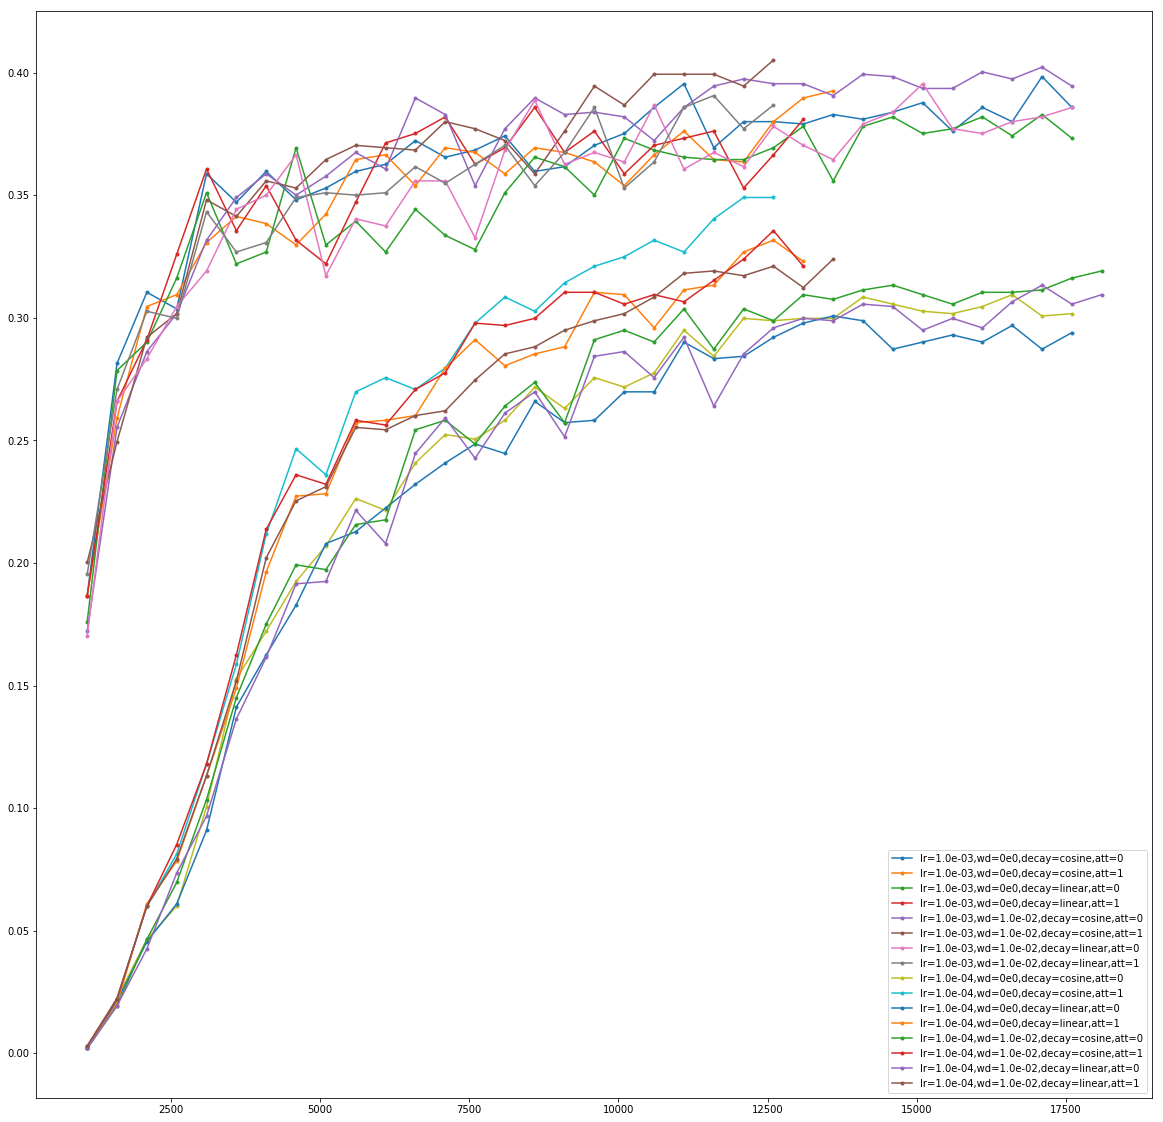

In [7]:
# See how accuracy varies over time
for k, v in sorted(accuracy_per_run.items()):
    plt.plot(v['x'], v['all'], marker='.', label=k)
plt.legend()

In [20]:
dev = json.load(open('../data/spider-20190205/dev.json'))
def compare(data, left, right):
    both_exact = []
    left_exact = []
    right_exact = []
    neither_exact = []
    for i, (data_item, left_item, right_item) in enumerate(zip(data, left['per_item'], right['per_item'])):
        result = {
            'i': i,
            'db_id': data_item['db_id'],
            'question': data_item['question'],
            'gold': data_item['query'],
            'left': left_item['predicted'],
            'right': right_item['predicted'],
        }
        
        if left_item['exact'] and right_item['exact']:
            both_exact.append(result)
        elif left_item['exact']:
            left_exact.append(result)
        elif right_item['exact']:
            right_exact.append(result)
        else:
            neither_exact.append(result)
    return both_exact, left_exact, right_exact, neither_exact        

In [22]:
both_exact, left_exact, right_exact, neither_exact = compare(
    dev,
    json.load(open('../logdirs/20190428-random/fixed=init,att=0/eval-val-step38100-bs1.jsonl')),
    json.load(open('../logdirs/20190428-random/fixed=init,att=1/eval-val-step33100-bs1.jsonl')))
len(both_exact)/len(dev), len(left_exact)/len(dev), len(right_exact)/len(dev)

(0.27949709864603484, 0.09671179883945841, 0.08317214700193423)

In [23]:
both_exact, left_exact, right_exact, neither_exact = compare(
    dev,
    json.load(open('../logdirs/20190428-random/fixed=data+model,att=0/eval-val-step37100-bs1.jsonl')),
    json.load(open('../logdirs/20190428-random/fixed=data+model,att=1/eval-val-step40000-bs1.jsonl')))
len(both_exact)/len(dev), len(left_exact)/len(dev), len(right_exact)/len(dev)

(0.27852998065764023, 0.09090909090909091, 0.10348162475822051)

In [26]:
both_exact, left_exact, right_exact, neither_exact = compare(
    dev,
    json.load(open('../logdirs/20190428-stability/bs=100,lr=1.0e-03,end_lr=0e0,att=0/eval-val-step10100-bs1.jsonl')),
    json.load(open('../logdirs/20190428-stability/bs=50,lr=1.0e-03,end_lr=0e0,att=0/eval-val-step21100-bs1.jsonl')))
len(both_exact)/len(dev), len(left_exact)/len(dev), len(right_exact)/len(dev)

(0.3181818181818182, 0.08704061895551257, 0.08317214700193423)